In [ ]:
#Decision Tree's yani Karar Ağaçları, sınıflandırma problemleri için sıklıkla kullanılır.
#Öncelikle ağaç oluşturulur ve eldeki veri bu ağaca uygulanır.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
dataset = pd.read_csv('DataSet/ReklamKampanyalari.csv')

In [2]:
print(dataset)

     KullaniciID Cinsiyet  Yas  TahminiMaas  SatinAldiMi
0       15624510    Erkek   19        19000            0
1       15810944    Erkek   35        20000            0
2       15668575    Kadın   26        43000            0
3       15603246    Kadın   27        57000            0
4       15804002    Erkek   19        76000            0
..           ...      ...  ...          ...          ...
395     15691863    Kadın   46        41000            1
396     15706071    Erkek   51        23000            1
397     15654296    Kadın   50        20000            1
398     15755018    Erkek   36        33000            0
399     15594041    Kadın   49        36000            1

[400 rows x 5 columns]


In [3]:
#Kullandığımız veriseti beş nitelikten oluşuyor. Veriseti bir sosyal medya kayıtlarından denlenmiştir.
#Bu verisetinde hedef değişkeni SatinAlimDurumu'dur.

In [4]:
#Biz testlerimizde bağımsız değişken olarak YAŞ ve MAAŞ ı kullanacağız.
X = dataset.iloc[:,[2,3]].values
y= dataset.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#Bağımsız değişkenlerden yaş ile tahmini gelir aynı birimde olmadığı için feature scaling uygulayacağız.
#Feature Scaling: Değişkenler arasındaki ölçüm farklılığını gidermektir. Yani modellerin ölçüm problemlerine maruz kalmadan, yani büyüklüğü/küçük algılarında yanılsamalara uğramadan, değişkenlere kendi içindeki dağğılımlarını korumayı eşit koşullarda yaklaşır.ç
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
#Modeli oluştururken ilk parametrede ağaç oluşturma kriteri olarak entrop seçtik.
#Yani verideki düzensizliği ve belirsizliği ölçer
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
#Şimdi ise tahmin yapalım
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


In [ ]:
#Matriste de gördüğünüz gibi totalde 9 hata var.

/var/folders/49/b8_gp7sj3gz3p9v2sm33smfc0000gn/T/ipykernel_32060/3411871219.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


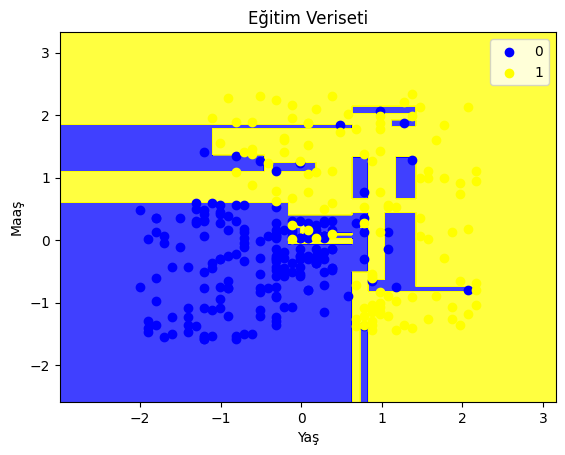

In [15]:
#Şimdi eğitimseti için grafik oluşturalım:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                  np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
          alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Eğitim Veriseti')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

/var/folders/49/b8_gp7sj3gz3p9v2sm33smfc0000gn/T/ipykernel_32060/2706308959.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


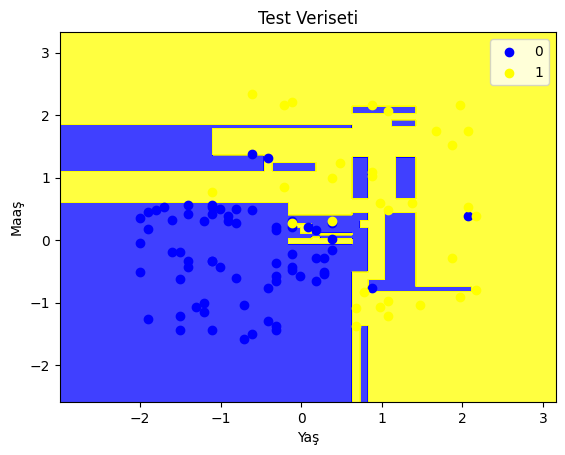

In [16]:
#test seti için grafik oluşturalım:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Test Veriseti')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

In [ ]:
#Yukarıda 9 adet hatalı var demiştik, Mavi böglede 2 adet sarı, sarı bölgedeise 7 adet mavi nokta var.